# I. Condorcet's Jury Theorem (1785)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

Let's import all the necessary packages:

In [28]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pandas import DataFrame

**Answer to question 1 -  plot the probability a jury of  n  voters (odd) is correct as a function of  p  for different  n  using Monte-Carlo simulations (sampling and averaging):**

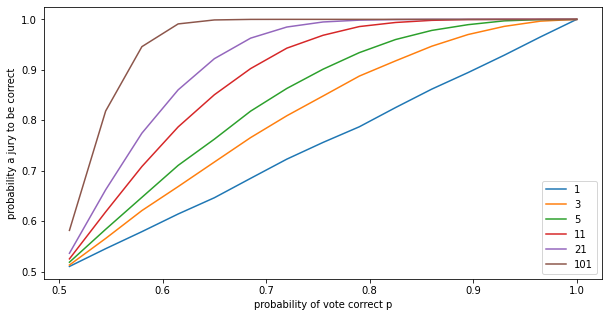

In [29]:
# define our number of voters
voters_num = [1, 3, 5, 11, 21, 101]
# probability for each voter to be correct
p_correct = np.linspace(0.51, 1, num=15)
# number of time to sample in Monte-Carlo simulation
M = 100000

# set figure size
plt.figure(figsize=(10, 5))

# loop over each number of voters
for n in voters_num:
    #
    lst = []
    # loop over each probability value
    for p in p_correct:
        # sample for n voters m samples to be correct with the probability p
        sample = np.random.binomial(1, p, (n,M))
        # for each column=experiment sum number of voters who voted correct
        sample = sample.sum(axis=0)
        # for each column=experiment see if jury vote is correct
        sample = sample >= (n/2)
        # average the correctness of all columns=experiments
        avg = sample.mean()
        # append average to list
        lst.append(avg)
    
    # add line plot
    plt.plot(p_correct, lst, label=n)

# show plot
plt.ylabel("probability a jury to be correct")
plt.xlabel("probability of vote correct p")
plt.legend(loc="lower right")
plt.show()

**Answer to question 2 - Prove that as the number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers):**

Given n voters (odd), p > 0.5 each individual voter has a vote $X_i$. Taking the value either +1 = correct or −1 = incorrect in accordance with his or her opinion, and then the group decision is either +1 = correct or −1 = incorrect depending on whether $S_n = \sum_{i=1}^{n} X_i$ is positive or negative. Let:

$$k = p − 0.5 > 0$$

Since the problem is fair in positive and negative, we may without loss of generality assume the correct answer is positive, Then:

$$E(X) = p * 1 + (1-p) * -1 = 2p-1 = 2(p-0.5) = 2k > 0$$

The weak law of large numbers states that $\dfrac{S_n}{n}$ converges in probability to $E(X)= 2k$ Where by converging in probability we mean that for any $\epsilon_1, \epsilon_2 > 0$ there is $N$  large enough such that for every:

$$n ≥ N, P(|\dfrac{S_n}{n} − E(X)| < \epsilon_1) > 1 − \epsilon_2.$$


Taking $\epsilon_1 = 2k$ we see that the probability of a correct decision is:

$$P(Sn > 0) = P(\dfrac{S_n}{n} > 0) = P(|\dfrac{S_n}{n} - 2k| < 2k) \rightarrow 1$$

which is what we needed to show.

# II. AdaBoost
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-10,loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:** 
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`.
 2. Explain you results in text and support it with figures.

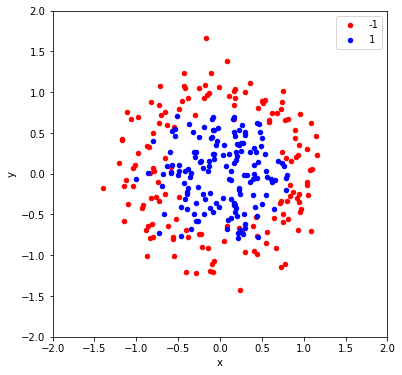

In [30]:
# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [31]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


Plots of the final decision plane for each ensemble model on training set


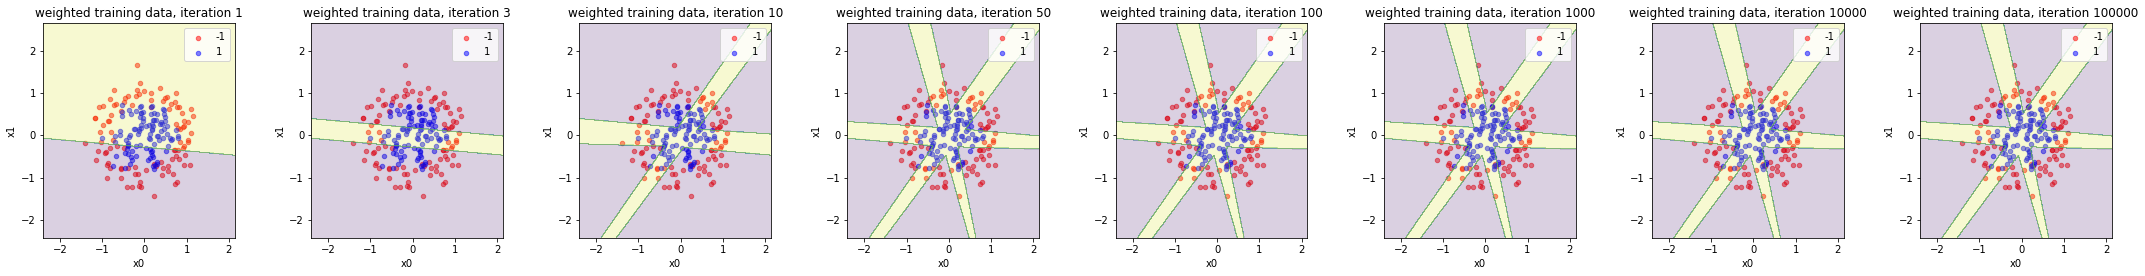

Plot of the final decision plane for the last ensemble model on test set


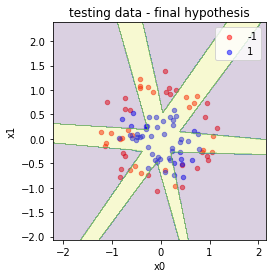

In [32]:
# create weak learner 
base_weak = LinearSVC(tol=1e-10, loss='hinge',
                      C=1000, max_iter=50000, 
                      random_state=0)

# split into 2/3rd train set and 1/3 test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=0)

# define number of estimators
estimators = [1, 3, 10, 50, 100, 1000, 10000, 100000]

# create ensemble using weak learner and each estimator
classifiers = [AdaBoostClassifier(base_estimator=base_weak,
                                  n_estimators=n, algorithm='SAMME',
                                  random_state=0) for n in estimators]
# train each classifier
classifiers = [clf.fit(X_train, y_train) for clf in classifiers]

# get train accuracies for each classifier
train_acc = [clf.score(X_train, y_train) for clf in classifiers]

# get test accuracies for each classifier
test_acc = [clf.score(X_test, y_test) for clf in classifiers]

# plot the final decision plane of ensemble model
# in the corresponding sub plot
print(("Plots of the final decision plane for each ensemble " 
       "model on training set"))
fig, ax = plt.subplots(1, len(estimators), figsize=(30, 10))
for i, clf in enumerate(classifiers):
    plot_data(X_train, y_train, clf.predict, ax[i])
    ax[i].set_title(f"weighted training data, iteration {estimators[i]}")
plt.tight_layout()
plt.show()

# plot the final decision plane of the ensemble model
# on test set
print(("Plot of the final decision plane for the last ensemble " 
       "model on test set"))
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_title(f"testing data - final hypothesis")
plot_data(X_test, y_test, classifiers[-1].predict, ax)
plt.show()

## Your answers here

### Answer to question 1 - How does the overall train set accuracy change with  n?

First lets see what is the train set accuracy by n:

In [33]:
for i in zip(estimators, train_acc):
    print(f"n={i[0]}, train accuracy={i[1]}")

n=1, train accuracy=0.582089552238806
n=3, train accuracy=0.6119402985074627
n=10, train accuracy=0.6915422885572139
n=50, train accuracy=0.7761194029850746
n=100, train accuracy=0.7761194029850746
n=1000, train accuracy=0.7761194029850746
n=10000, train accuracy=0.7761194029850746
n=100000, train accuracy=0.7761194029850746


Next let's plot a line plot to better understand these values:

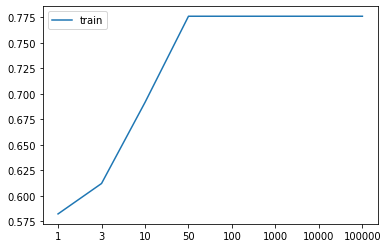

In [34]:
labels = list(map(str, estimators))
plt.plot(labels, train_acc, label="train")
plt.legend()
plt.show()

We can see that we improve train accuracy until n=50 and then train accuracy does not change.

### Answer to question 2 - Does your model start to overfit at some point? How can you test and detect such a point?

Lets see what is the train set accuracy and test set accuracy by n:

In [35]:
for i in zip(estimators, train_acc, test_acc):
    print(f"n={i[0]}, train accuracy={i[1]}, test accuracy={i[2]}")

n=1, train accuracy=0.582089552238806, test accuracy=0.5050505050505051
n=3, train accuracy=0.6119402985074627, test accuracy=0.5656565656565656
n=10, train accuracy=0.6915422885572139, test accuracy=0.6060606060606061
n=50, train accuracy=0.7761194029850746, test accuracy=0.6161616161616161
n=100, train accuracy=0.7761194029850746, test accuracy=0.6161616161616161
n=1000, train accuracy=0.7761194029850746, test accuracy=0.6161616161616161
n=10000, train accuracy=0.7761194029850746, test accuracy=0.6161616161616161
n=100000, train accuracy=0.7761194029850746, test accuracy=0.6161616161616161


Next let's plot a line plot to better understand these values:

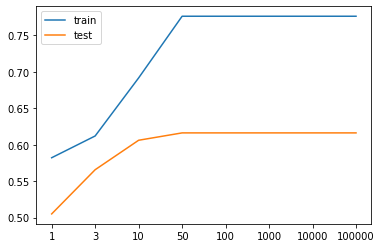

In [36]:
labels = list(map(str, estimators))
plt.plot(labels, train_acc, label="train")
plt.plot(labels, test_acc, label="test")
plt.legend()
plt.show()

we can see our model strats to overfit at n>10. The model is overfitting to the train data causing a huge gap between the train and test accuracy.

### Answer to question 3 - For this specific task, what is the optimal number of estimators? Hint: use estimator_errors_ attribute



The estimator_errors_ is the classification error for each estimator in the boosted ensemble so let's plot the estimator_errors_:

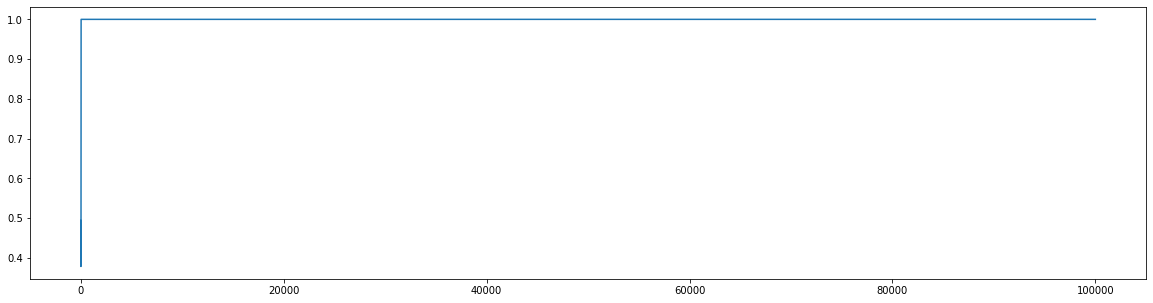

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(classifiers[-1].estimator_errors_)
plt.show()

we can see this plot doesn't tell us much. We can see that after some small value the error stays the same so let's plot the estimator_errors_ for the beginning.

Because our model accuracy stays the same after 50 estimators, lets see if the error for number of estimators after 50 changes (probably not):

In [38]:
set(classifiers[-1].estimator_errors_[50:])

{1.0}

We can see it doesn't, meaning we can look only up to 50 estimators:

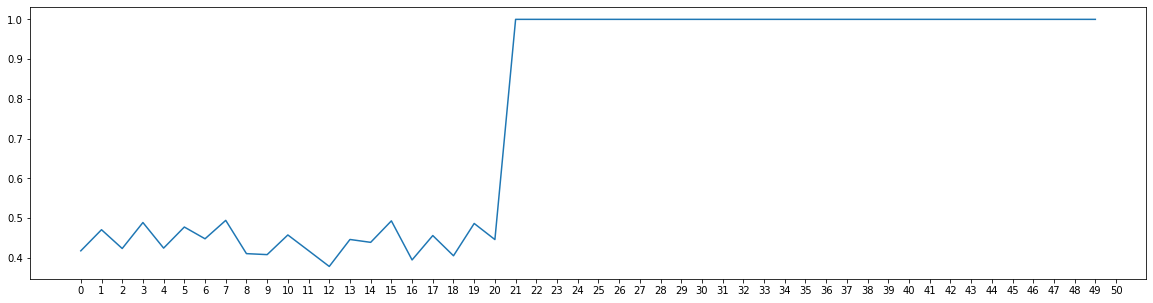

In [39]:
classifiers[-1].estimator_errors_
plt.figure(figsize=(20, 5))
plt.plot(classifiers[-1].estimator_errors_[:50])
plt.xticks(range(0,51))
plt.show()

so it looks like 21 estimators is the best number of estimators (from there we don't learn any more).